<a href="https://colab.research.google.com/github/danyagomezcantu/linear_programming_project/blob/main/Proyecto_LP_sumando10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar el paquete (asegúrate de que la instalación se realice correctamente)
!pip install ucimlrepo

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn.decomposition import PCA
import time
from ucimlrepo import fetch_ucirepo #Libreria para importar los datos

# Obtener el conjunto de datos
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Datos (como DataFrames de pandas)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadatos
print(breast_cancer_wisconsin_diagnostic.metadata)

# Información de las variables
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
#Transformando en un dataframe para manipularlo
df = pd.concat([X, y], axis=1)
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


<ipython-input-5-20a01e06335f>:75: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c.flatten(), A_ub=A_ineq, b_ub=b_ineq.flatten(), bounds=bounds, method='simplex',options={'maxiter': 5000})


Resultado del LP:
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [-2.160e-02 -1.522e-02 ...  0.000e+00  0.000e+00]
     nit: 638
Tiempo de CPU: 4.290238876 segundos
Número de iteraciones: 638
Valor óptimo: 0.0

Solución óptima:
w = [-0.02160077 -0.01521666  0.028029   -0.00139662  0.          0.
  0.          0.          0.          0.          0.          0.14584452
 -0.13233911  0.00501037  0.          0.          0.          0.
  0.          0.          0.01396655 -0.00464136  0.00364734 -0.00030095
  0.          0.         -0.27268166  0.          0.          0.        ]
beta = 0.0


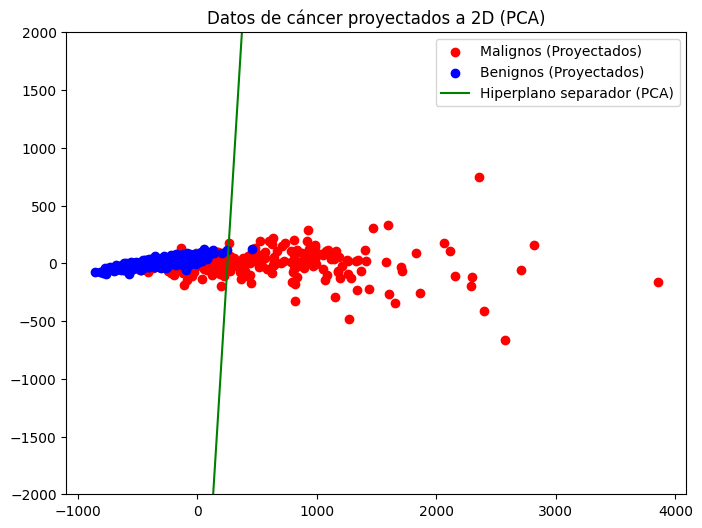

In [ ]:
# ---------------------------
# Definimos las características
features = [col for col in df.columns if col != "Diagnosis"]


# ---------------------------
# Separación de grupos:
# Grupo A: Malignos (Diagnosis == "M")
# Grupo B: Benignos (Diagnosis == "B")
A_df = df[df["Diagnosis"] == "M"].drop(columns=["Diagnosis"])
B_df = df[df["Diagnosis"] == "B"].drop(columns=["Diagnosis"]) + 10


# Extraemos las matrices de características
X_A = A_df[features].values
X_B = B_df[features].values

# Dimensiones:
m, n = X_A.shape   # m: número de datos malignos.
p, _ = X_B.shape   # p: número de datos benignos.

# ---------------------------
# Planteamiento del LP

# Número total de variables: n (w) + 1 (beta) + m (slack para A) + p (slack para B)
num_vars = n + 1 + m + p

# Vector objetivo: 0 para [w; beta] y 1/m para cada slack en A, 1/p para cada slack en B
c1 = np.zeros((n + 1, 1))
c2 = np.ones((m, 1)) / m
c3 = np.ones((p, 1)) / p
c = np.vstack([c1, c2, c3])

# ---------------------------
# Construcción de las restricciones

# Restricción para el grupo A:
# Para cada x_i en A: -w^T x_i - slack_A[i] + beta <= -1
A1 = np.hstack([-X_A, np.ones((m, 1))])   # -X_A para w y +1 para beta
I_m = np.eye(m)                           # Identidad para las variables slack de A
A1 = np.hstack([A1, -I_m])                 # -1 para cada slack_A
O_mp = np.zeros((m, p))                   # Ceros para las variables slack de B
A1 = np.hstack([A1, O_mp])
b1 = -np.ones((m, 1))

# Restricción para el grupo B:
# Para cada x_j en B: w^T x_j - beta - slack_B[j] <= -1
A2 = np.hstack([X_B, -np.ones((p, 1))])     # X_B para w y -1 para beta
O_pm = np.zeros((p, m))                    # Ceros para slack de A
A2 = np.hstack([A2, O_pm])
I_p = np.eye(p)                          # Identidad para slack_B
A2 = np.hstack([A2, -I_p])
b2 = -np.ones((p, 1))

# Combinamos ambas restricciones:
A_ineq = np.vstack([A1, A2])
b_ineq = np.vstack([b1, b2])

# ---------------------------
# Definición de las cotas de las variables

# Para [w; beta]: sin restricciones (variables libres)
# Para las variables de holgura: deben ser >= 0
bounds = []
v_bound = (-float('inf'), float('inf'))
for i in range(n + 1):
    bounds.append(v_bound)
slack_bound = (0, float('inf'))
for i in range(m + p):
    bounds.append(slack_bound)

# ---------------------------
# Resolución del LP usando linprog (método 'simplex')
start_time = time.process_time()
result = linprog(c.flatten(), A_ub=A_ineq, b_ub=b_ineq.flatten(), bounds=bounds, method='simplex',options={'maxiter': 5000})
end_time = time.process_time()

print("Resultado del LP:")
print(result)
print("Tiempo de CPU:", end_time - start_time, "segundos")
print("Número de iteraciones:", result.nit)
print("Valor óptimo:", result.fun)

# Extraer la solución
solution = result.x
w = solution[:n]           # Coeficientes del hiperplano
beta = solution[n]         # Término independiente beta
slack_A = solution[n + 1 : n + 1 + m]
slack_B = solution[n + 1 + m : ]

print("\nSolución óptima:")
print("w =", w)
print("beta =", beta)

# ---------------------------
# Visualización (Usando PCA para proyección)
# ---------------------------

# Aplicamos PCA para proyectar a 2D
pca = PCA(n_components=2)
X_total = np.vstack([X_A, X_B])
X_proj = pca.fit_transform(X_total)
X_A_proj = X_proj[:X_A.shape[0], :]
X_B_proj = X_proj[X_A.shape[0]:, :]

# Obtenemos la media de los datos originales
mu = pca.mean_

# Calculamos el hiperplano en el espacio proyectado
# w_pca = P * w, donde P son los componentes principales (cada fila de pca.components_ es un componente)
w_pca = pca.components_.dot(w)
offset_pca = beta - w.dot(mu)

# Definimos un rango para y1 (la primera componente en PCA)
y1_min = np.min(X_proj[:, 0]) - 1
y1_max = np.max(X_proj[:, 0]) + 1
y1_line = np.linspace(y1_min, y1_max, 100)

# Calculamos y2 en función de y1 usando la ecuación del hiperplano en PCA:
# w_pca[0] * y1 + w_pca[1] * y2 = offset_pca  => y2 = (offset_pca - w_pca[0]*y1) / w_pca[1]
y2_line = (offset_pca - w_pca[0]*y1_line) / w_pca[1]

# Graficamos los datos proyectados y el hiperplano
plt.figure(figsize=(8, 6))

plt.scatter(X_A_proj[:, 0], X_A_proj[:, 1], color='red', label='Malignos (Proyectados)')
plt.scatter(X_B_proj[:, 0], X_B_proj[:, 1], color='blue', label='Benignos (Proyectados)')
plt.plot(y1_line, y2_line, color='green', label='Hiperplano separador (PCA)')
plt.ylim(-2000, 2000)
plt.title("Datos de cáncer proyectados a 2D (PCA)")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()



In [ ]:
# ---------------------------
# PLANTEAMIENTO DEL DUAL
# Variables duales:
#   u en R^m asociados a las restricciones del grupo A
#   v en R^p asociados a las restricciones del grupo B
#
# Objetivo dual: max(sum(u)+sum(v)) -> min(- (sum(u)+sum(v)))
c_dual = -np.ones(m + p)

# Restricciones de igualdad:
# 1) Restricción vectorial:
#    sum_{i=1}^m u_i * X_A[i,k] - sum_{j=1}^p v_j * X_B[j,k] = 0, para cada k = 0, …, n-1.
A_dual_vec = np.hstack([X_A.T, -X_B.T])  # Dimensión: (n, m+p)
b_dual_vec = np.zeros(n)

# 2) Restricción escalar:
#    sum(u) - sum(v) = 0.
A_dual_scalar = np.hstack([np.ones(m), -np.ones(p)]).reshape(1, m+p)
b_dual_scalar = np.zeros(1)

# Combinamos ambas restricciones de igualdad:
A_eq_dual = np.vstack([A_dual_vec, A_dual_scalar])  # Dimensión: (n+1, m+p)
b_eq_dual = np.hstack([b_dual_vec, b_dual_scalar])

# Límites para las variables duales:
# Para u: 0 <= u_i <= 1/m, para v: 0 <= v_j <= 1/p.
bounds_dual = [(0, 1/m)] * m + [(0, 1/p)] * p

# ---------------------------
# Resolución del Dual con el método simplex
result_dual = linprog(c_dual, A_eq=A_eq_dual, b_eq=b_eq_dual, bounds=bounds_dual,
                        method='simplex', options={'maxiter': 5000})

print("Resultado del LP Dual:")
print(result_dual)

if result_dual.success:
    sol_dual = result_dual.x
    u = sol_dual[:m]
    v = sol_dual[m:]
    print("\nSolución dual óptima:")
    print("u =", u)
    print("v =", v)
    # Dado que minimizamos:
    print("Valor óptimo dual:", -result_dual.fun)
else:
    print("El LP dual no convergió.")


<ipython-input-6-62ca6e771220>:32: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result_dual = linprog(c_dual, A_eq=A_eq_dual, b_eq=b_eq_dual, bounds=bounds_dual,


Resultado del LP Dual:
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 1308

Solución dual óptima:
u = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:

#Definimos nuestras funciones para proyectar ambos laos del hiperplano.

def plot_Aw_plus_y_pca(w, beta, y, X_A, X_A_proj):
    m = X_A.shape[0]
    Aw_y = np.array([np.dot(X_A[i], w) + y[i] for i in range(m)])

    plt.figure()
    # Eje horizontal: X_A_proj[:,0] (primera componente principal)
    # Eje vertical: Aw_y
    plt.scatter(X_A_proj[:, 0], Aw_y, c='red', label='A w + y')
    plt.axhline(y=beta+1, color='k', linestyle='--', label='beta + 1')
    plt.xlabel("Primera componente principal (A)")
    plt.ylabel("A w + y (valor)")
    plt.title("Gráfica A w + y vs. PCA[0]")
    plt.legend()
    plt.show()

#Ahora hacemos Bw-y
def plot_Bw_minus_y_pca(w, beta, y, X_B, X_B_proj):
    p = X_B.shape[0]
    Bw_y = np.array([np.dot(X_B[j], w) - y[j] for j in range(p)])

    plt.figure()
    # Eje horizontal: X_B_proj[:,0] (primera componente principal)
    # Eje vertical: Bw_y
    plt.scatter(X_B_proj[:, 0], Bw_y, c='blue', label='B w - y')
    plt.axhline(y=beta-1, color='k', linestyle='--', label='beta - 1')
    plt.xlabel("Primera componente principal (B)")
    plt.ylabel("B w - y (valor)")
    plt.title("Gráfica B w - y vs. PCA[0]")
    plt.legend()
    plt.show()

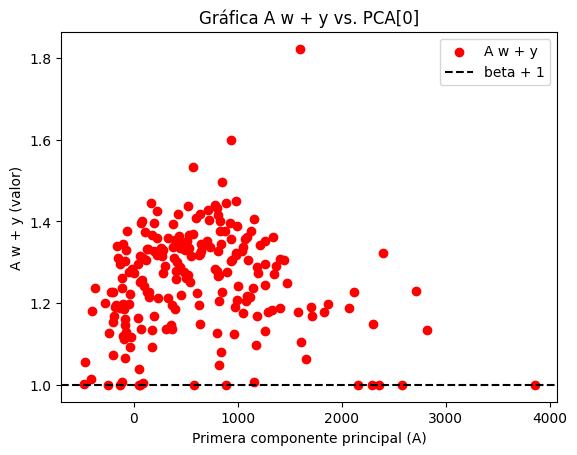

In [ ]:

plot_Aw_plus_y_pca(w, beta, slack_A, X_A, X_A_proj)


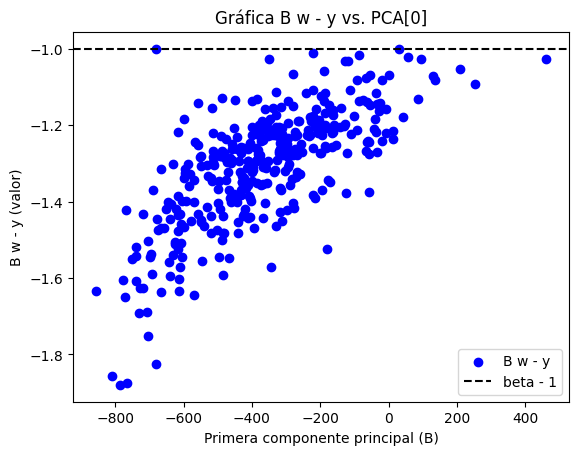

In [ ]:
plot_Bw_minus_y_pca(w, beta, slack_B, X_B, X_B_proj)

In [ ]:
# A w + y
Aw_y = X_A @ w + slack_A

# Vector delta^A = (A w + y) - (beta + 1)*ones(m)
delta_A = Aw_y - (beta + 1)

# Norma Euclídea
norm_deltaA_2 = np.linalg.norm(delta_A, ord=2)
min_deltaA = np.min(delta_A)

print("Norma L2 de (Aw + y):", norm_deltaA_2)
print("Mínimo de (Aw + y)  :", min_deltaA)


Norma L2 de (Aw + y - (beta+1)): 4.128663665287406
Mínimo de (Aw + y - (beta+1))  : 1.9095836023552692e-14


In [ ]:
# Para el grupo B:
# Calculamos Bw - slack_B para cada punto de B:
Bw_z = X_B @ w - slack_B  # Nota: slack_B es el vector de holguras para B

# Delta_B: diferencia entre el umbral y el valor obtenido
delta_B = (beta - 1) - Bw_z

# Norma Euclídea (L2)
norm_deltaB_2 = np.linalg.norm(delta_B, ord=2)
# Valor mínimo (peor caso)
min_deltaB = np.min(delta_B)

print("Norma L2 de Bw - y):", norm_deltaB_2)
print("Mínimo de BW - y))  :", min_deltaB)

Norma L2 de Bw - y): 6.5100331355329635
Mínimo de BW - y))  : -3.2862601528904634e-14


In [ ]:
num_malignos = A_df.shape[0]
num_benignos = B_df.shape[0]

print("Número de datos malignos (Grupo A):", num_malignos)
print("Número de datos benignos (Grupo B):", num_benignos)


Número de datos malignos (Grupo A): 212
Número de datos benignos (Grupo B): 357
